In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

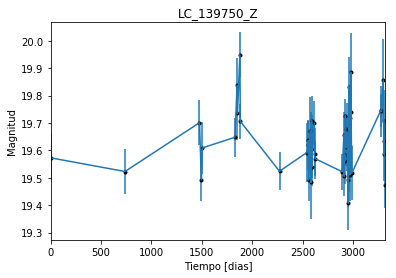

In [8]:
data = np.genfromtxt('LC_139750_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_139750_Z')
plt.savefig("LC_139750_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

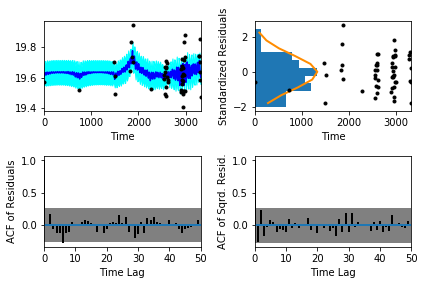

In [5]:
sample.assess_fit()

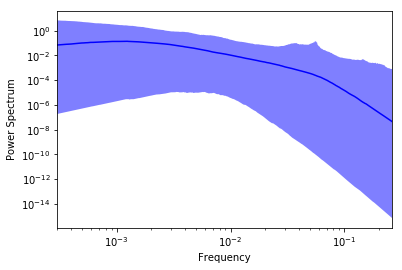

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

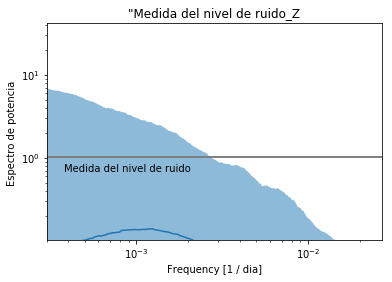

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_139750_Z')
plt.title('"Medida del nivel de ruido_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_139750_Z')

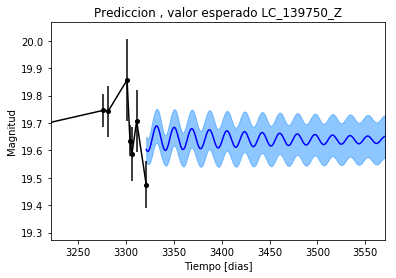

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_139750_Z')

Text(0.5,1,'Prediccion, Caminos simulados  LC_139750_Z')

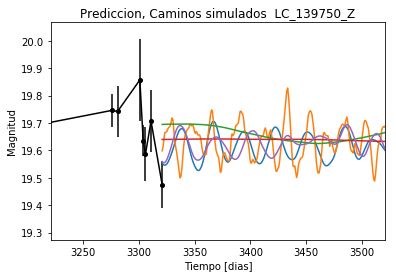

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_139750_Z')

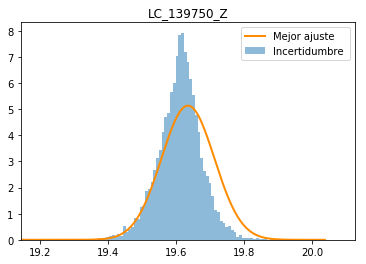

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_139750_Z')
plt.savefig("Mejor_ajuste_LC_139750_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_139750_Z')

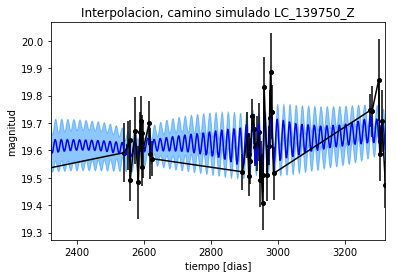

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_139750_Z')

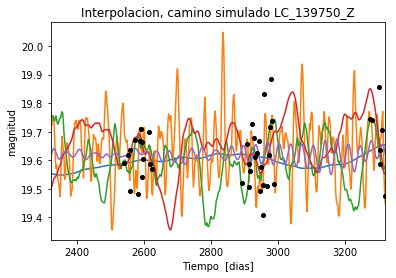

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_139750_Z')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1530.84014078
Median: 0.00648472104396
Standard deviation: 0.0848233244556
68% credibility interval: [ 0.00080167  0.07007098]
95% credibility interval: [ 0.00035195  0.34055995]
99% credibility interval: [  3.10834334e-04   4.73114654e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 641.590427337
Median: 0.00371846284849
Standard deviation: 0.0556876432357
68% credibility interval: [ 0.00062253  0.03432353]
95% credibility interval: [ 0.00033547  0.17909193]
99% credibility interval: [  3.09048482e-04   3.81088114e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 573.646986876
Median: 0.0104616105825
Standard deviatio

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 2194.12858663
Median: 65.5670991375
Standard deviation: 1.57660201579
68% credibility interval: [ 64.00782    66.7666324]
95% credibility interval: [ 61.61385531  68.13669664]
99% credibility interval: [ 59.8981124   69.34255532]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 866.557195856
Median: 0.41623580118
Standard deviation: 1.13654962294
68% credibility interval: [ 0.04857486  2.01715914]
95% credibility interval: [ 0.01284259  4.04517265]
99% credibility interval: [ 0.00999425  5.48555821]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 744.71730753
Median: 0.391727116072
Standard deviation: 2.83965032991
68% credibility interval: [ 0.03237416  3.59833801]
95% credibility interval: [  1.41946219e-03 

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 5241.81410951
Median: 2.56671441737
Standard deviation: 6.92894316525e+113
68% credibility interval: [  4.99756017e-51   9.29501465e+49]
95% credibility interval: [  9.20576303e-089   1.34405269e+103]
99% credibility interval: [  1.97525249e-108   3.50572995e+107]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2470.99731468
Median: 19.6224306364
Standard deviation: 0.026849917177
68% credibility interval: [ 19.6001134   19.64378637]
95% credibility interval: [ 19.56343741  19.67124711]
99% credibility interval: [ 19.52533153  19.70049146]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 606.26396348
Median: 0.0557905473075
Standard deviation: 0.139763933606
68% credibility interval: [ 0.0002719   0.25724248]
95% credibility interval: [ 0.          0.47711215]
99% credibility interval: [ 0.          0.51413673]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 606.26396348
Median: 0.0557905473075
Standard deviation: 0.139763933606
68% credibility interval: [ 0.0002719   0.25724248]
95% credibility interval: [ 0.          0.47711215]
99% credibility interval: [ 0.          0.51413673]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 581.718484525
Median: 0.0
Standard deviation: 0.0201904742207
68% credib

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 2194.12858663
Median: 65.5670991375
Standard deviation: 1.57660201579
68% credibility interval: [ 64.00782    66.7666324]
95% credibility interval: [ 61.61385531  68.13669664]
99% credibility interval: [ 59.8981124   69.34255532]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2884.03190389
Median: 0.00427672062573
Standard deviation: 0.00609030379794
68% credibility interval: [ 0.00142373  0.00908005]
95% credibility interval: [ 0.0001228   0.01874252]
99% credibility interval: [  3.21615498e-06   3.32811551e-02]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2853.79071442
Median: 1.12835548627
Standard deviation: 0.20045016458
68% credibility interval: [ 0.94544743  1.33912824]
95% credibility interval: [ 0.80051737  1.57940988]
99% credibility interval: [ 0.70987136  1.7470737 ]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 787.670415248
Median: 6.60587627288e-08
Standard deviation: 0.05388042316
68% credibility interval: [  4.33189397e-53   2.10732348e-03]
95% credibility interval: [  1.18195092e-106   9.75350462e-002]
99% credibility interval: [  3.92625909e-110   3.27295106e-001]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1530.84014078
Median: (-0.0407447039846-0.173519830545j)
Standard deviation: 1.0272374549
68% credibility interval: [-0.44026895-1.2733179j  -0.00503702-0.00738707j]
95% credibility interval: [-2.13980125+0.j         -0.00221138-0.00870187j]
99% credibility interval: [ -2.97266704e+00+0.j          -1.95302972e-03-0.05800056j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 641.590427337
Median: (-0.0233637911349+0.11391640384j)
Standard deviation: 0.94530247827
68% credibility interval: [-0.21566110+0.149178j   -0.00391146+0.01057928j]
95% credibility interval: [-1.12526780+1.00721486j -0.00210782+0.j        ]
99% credibility interval: [ -2.39444724e+00+1.60382131j  -1.94180888e-03+1.77048044j]
Posterior summary for pa